# Credit Risk Scoring Project

In [1]:
!head CreditScoring.csv

"Status","Seniority","Home","Time","Age","Marital","Records","Job","Expenses","Income","Assets","Debt","Amount","Price"
1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
1,0,1,36,26,1,1,1,46,107,0,0,310,910
1,1,2,60,36,2,1,1,75,214,3500,0,650,1645
1,29,2,60,44,2,1,1,75,125,10000,0,1600,1800
1,9,5,12,27,1,1,1,35,80,0,0,200,1093
1,0,2,60,32,2,1,3,90,107,15000,0,1200,1957


In [2]:
# Toolbox
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

## Data Cleaning

In [3]:
df = pd.read_csv('CreditScoring.csv')

In [4]:
df.head()

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


In [5]:
df.columns = df.columns.str.lower()
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


In [6]:
# Converts numbers to strings in categorical columns
status_values = {
    1: 'ok',
    2: 'default',
    0: 'unk'
}

df.status = df.status.map(status_values)
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,1,60,30,2,1,3,73,129,0,0,800,846
1,ok,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,default,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,ok,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,ok,0,1,36,26,1,1,1,46,107,0,0,310,910


In [7]:
# Numbers to strings conversion for all the other categorical columns
home_values = {
    1: 'rent',
    2: 'owner',
    3: 'private',
    4: 'ignore',
    5: 'parents',
    6: 'other',
    0: 'unk'
}

df.home = df.home.map(home_values)
marital_values = {
    1: 'single',
    2: 'married',
    3: 'widow',
    4: 'separated',
    5: 'divorced',
    0: 'unk'
}

df.marital = df.marital.map(marital_values)
records_values = {
    1: 'no',
    2: 'yes',
    0: 'unk'
}

df.records = df.records.map(records_values)
job_values = {
    1: 'fixed',
    2: 'partime',
    3: 'freelance',
    4: 'others',
    0: 'unk'
}

df.job = df.job.map(job_values)

In [8]:
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,married,no,freelance,73,129,0,0,800,846
1,ok,17,rent,60,58,widow,no,fixed,48,131,0,0,1000,1658
2,default,10,owner,36,46,married,yes,freelance,90,200,3000,0,2000,2985
3,ok,0,rent,60,24,single,no,fixed,63,182,2500,0,900,1325
4,ok,0,rent,36,26,single,no,fixed,46,107,0,0,310,910


In [9]:
# Checks for how the distribution of values in each column
df.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,763317.0,1060341.0,404382.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,8703625.0,10217569.0,6344253.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3500.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,166.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,99999999.0,99999999.0,99999999.0,5000.0,11140.0


N.B. 99999999 indicate missing values and should replaced by `NaN`: 

In [10]:
# Replaces 99999999 with NaN
for c in ['income', 'assets', 'debt']:
    df[c] = df[c].replace(to_replace=99999999, value=np.nan)

In [11]:
df.isnull().sum()

status        0
seniority     0
home          0
time          0
age           0
marital       0
records       0
job           0
expenses      0
income       34
assets       47
debt         18
amount        0
price         0
dtype: int64

In [12]:
df.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4421.0,4408.0,4437.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,131.0,5403.0,343.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,86.0,11573.0,1246.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3000.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,165.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,959.0,300000.0,30000.0,5000.0,11140.0


In [13]:
df.status.value_counts()

ok         3200
default    1254
unk           1
Name: status, dtype: int64

In [14]:
# Removes a record with an unknown status 
df = df[df.status != 'unk']

## Data Preparation

In [15]:
df.isnull().sum()

status        0
seniority     0
home          0
time          0
age           0
marital       0
records       0
job           0
expenses      0
income       34
assets       47
debt         18
amount        0
price         0
dtype: int64

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
# Splits the dataset into training (60%), validation (20%) and test (20%) datsets
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=11)
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=11)

In [18]:
y_train = (df_train.status == 'default').values
y_val = (df_val.status == 'default').values

In [19]:
# Remove “status” category from the dataframes
del df_train['status']
del df_val['status']

In [20]:
len(df_train), len(df_val), len(df_test)

(2672, 891, 891)

## One-hot Encoding (OHE) using `DictVectorizer`

In [21]:
from sklearn.feature_extraction import DictVectorizer

In [22]:
df_train.isnull().sum()

seniority     0
home          0
time          0
age           0
marital       0
records       0
job           0
expenses      0
income       25
assets       30
debt         11
amount        0
price         0
dtype: int64

In [23]:
# Replace missing values with "0" and convert dataframe categorical variables to dictionaries
dict_train = df_train.fillna(0).to_dict(orient='records')
dict_val = df_val.fillna(0).to_dict(orient='records')

In [24]:
dict_train[0]

{'seniority': 10,
 'home': 'owner',
 'time': 36,
 'age': 36,
 'marital': 'married',
 'records': 'no',
 'job': 'freelance',
 'expenses': 75,
 'income': 0.0,
 'assets': 10000.0,
 'debt': 0.0,
 'amount': 1000,
 'price': 1400}

In [25]:
# Renders the list of dictionaries as input to DictVectorizer
dv = DictVectorizer(sparse=False)

X_train = dv.fit_transform(dict_train)
X_val = dv.transform(dict_val)

## Model Training

### Decision Trees


In [26]:
# `DecisionTreeClassifier` for classification
# Area Under the Curve for evaluating model quality
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

In [27]:
# Fit the tree with default parameters
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [28]:
# `predict_proba` to get the predictions (probabilities)
# checks the AUC on the training data
y_pred = dt.predict_proba(X_train)[:, 1]
roc_auc_score(y_train, y_pred)

1.0

In [29]:
# `predict_proba` to get the predictions (probabilities)
# checks the AUC on the validation data
y_pred = dt.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.6499327940713472

In [30]:
# Handling overfitting
# Changes the depth parameter by restricting the tree size to 2 levels

dt = DecisionTreeClassifier(max_depth=2)
dt.fit(X_train, y_train)

y_pred = dt.predict_proba(X_train)[:, 1]
auc = roc_auc_score(y_train, y_pred)
print('train auc: %.3f' % auc)

y_pred = dt.predict_proba(X_val)[:, 1]
auc = roc_auc_score(y_val, y_pred)
print('val auc: %.3f' % auc)

train auc: 0.705
val auc: 0.669


### Decision Tree Parameter Tuning

In [31]:
dt = DecisionTreeClassifier(max_depth=6)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6)

In [32]:
y_pred = dt.predict_proba(X_val)[:, 1]

In [33]:
roc_auc_score(y_val, y_pred)

0.7586247608437675

In [34]:
# Tunes max_depth parameter
for depth in [1, 2, 3, 4, 5, 6, 10, 15, 20, None]:
    dt = DecisionTreeClassifier(max_depth=depth)
    dt.fit(X_train, y_train)
    y_pred = dt.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    print('%4s -> %.3f' % (depth, auc))

   1 -> 0.606
   2 -> 0.669
   3 -> 0.739
   4 -> 0.761
   5 -> 0.767
   6 -> 0.746
  10 -> 0.670
  15 -> 0.661
  20 -> 0.660
None -> 0.643


In [35]:
for m in [1, 5, 10, 15, 20, 50, 100, 200]:
    dt = DecisionTreeClassifier(max_depth=4, min_samples_leaf=m)
    dt.fit(X_train, y_train)
    y_pred = dt.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    print('%s -> %.3f' % (m, auc))

1 -> 0.761
5 -> 0.761
10 -> 0.761
15 -> 0.764
20 -> 0.761
50 -> 0.753
100 -> 0.756
200 -> 0.747


In [36]:
# Tunes min_leaf_size parameter
for m in [4, 5, 6]:
    print('depth: %s' % m)

    for s in [1, 5, 10, 15, 20, 50, 100, 200]:
        dt = DecisionTreeClassifier(max_depth=m, min_samples_leaf=s)
        dt.fit(X_train, y_train)
        y_pred = dt.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        print('%s -> %.3f' % (s, auc))
    
    print()

depth: 4
1 -> 0.761
5 -> 0.761
10 -> 0.761
15 -> 0.764
20 -> 0.761
50 -> 0.753
100 -> 0.756
200 -> 0.747

depth: 5
1 -> 0.766
5 -> 0.768
10 -> 0.762
15 -> 0.772
20 -> 0.774
50 -> 0.768
100 -> 0.763
200 -> 0.759

depth: 6
1 -> 0.751
5 -> 0.762
10 -> 0.778
15 -> 0.785
20 -> 0.774
50 -> 0.772
100 -> 0.776
200 -> 0.768



In [37]:
for m in [1, 5, 10, 15, 20, 50, 100, 200]:
    dt = DecisionTreeClassifier(max_depth=6, min_samples_leaf=m)
    dt.fit(X_train, y_train)
    y_pred = dt.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    print('%s -> %.3f' % (m, auc))

1 -> 0.748
5 -> 0.760
10 -> 0.778
15 -> 0.785
20 -> 0.774
50 -> 0.770
100 -> 0.776
200 -> 0.768


In [38]:
# Trains the final model
dt = DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred_dt)

0.7853194400716863

In [39]:
from sklearn.metrics import roc_curve

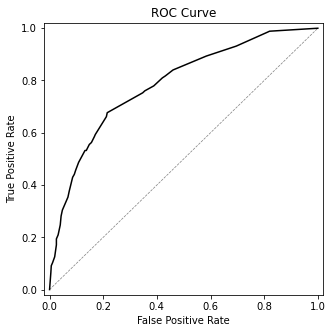

In [40]:
fpr, tpr, _ = roc_curve(y_val, y_pred_dt)

plt.figure(figsize=(5, 5))

plt.plot(fpr, tpr, color='black')
plt.plot([0, 1], [0, 1], color='black', lw=0.7, linestyle='dashed', alpha=0.5)

plt.xlim([-0.02, 1.02])
plt.ylim([-0.02, 1.02])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('ROC Curve')

plt.show()

### Random Forest

In [41]:
from sklearn.ensemble import RandomForestClassifier

In [42]:
# Specifies the number of trees needed in the ensemble
rf = RandomForestClassifier(n_estimators=10)
rf.fit(X_train, y_train)
y_pred = rf.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.797016904410162

In [43]:
# Specifies a reduced number of ensemble trees
rf = RandomForestClassifier(n_estimators=10)
rf.fit(X_train, y_train)
y_pred = rf.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.7876474292218643

In [44]:
# Repeats specification a 100 times and checks for the mean and standard deviation
#A Creates a list with AUC results
#B Train progressively more trees in each iteration
#C Evaluate the score
#D Adds the score to the list with other scores
#E Checks for the mean AUC
#F Checks for the AUC standard deviation
aucs = [] #A

for i in range(100): #B
    rf = RandomForestClassifier(n_estimators=10) #B
    rf.fit(X_train, y_train) #B
    
    y_pred = rf.predict_proba(X_val)[:, 1] #C
    auc = roc_auc_score(y_val, y_pred) #C
    aucs.append(auc) #D

auc_mean = np.mean(aucs) #E
auc_std = np.std(aucs) #F
print('%.3f +- %.3f' % (auc_mean, auc_std))
print('%.3f -- %.3f' % (auc_mean -  auc_std, auc_mean + auc_std))

0.785 +- 0.010
0.775 -- 0.795


In [45]:
# Sets the random seed
rf = RandomForestClassifier(n_estimators=10, random_state=3)
rf.fit(X_train, y_train)
y_pred = rf.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.7811145285897654

In [46]:
# Checks for AUC dependency on tree number
aucs = []

for i in range(10, 201, 10):
    rf = RandomForestClassifier(n_estimators=i, random_state=3)
    rf.fit(X_train, y_train)
    y_pred = rf.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    print('%s -> %.3f' % (i, auc))
    aucs.append(auc)

10 -> 0.781
20 -> 0.801
30 -> 0.813
40 -> 0.815
50 -> 0.816
60 -> 0.817
70 -> 0.818
80 -> 0.818
90 -> 0.820
100 -> 0.819
110 -> 0.819
120 -> 0.821
130 -> 0.822
140 -> 0.822
150 -> 0.820
160 -> 0.820
170 -> 0.819
180 -> 0.820
190 -> 0.820
200 -> 0.820


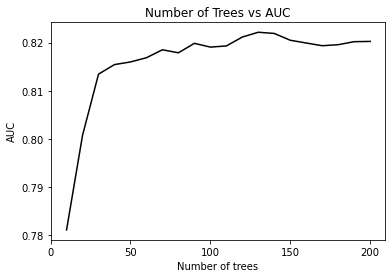

In [47]:
plt.figure(figsize=(6, 4))

plt.plot(range(10, 201, 10), aucs, color='black')
plt.xticks(range(0, 201, 50))

plt.title('Number of Trees vs AUC')
plt.xlabel('Number of trees')
plt.ylabel('AUC')



plt.show()

In [48]:
# Tunes the max_depth parameter
#A Creates a dictionary with the AUC results
#B Iterates over the different depth values
#C Creates a list with AUC results for the current depth level
#D Iterates over the different n_estimator values
#E Evaluate the model
#F Saves the AUCs for the current depth level in the dictionary
all_aucs = {} #A

for depth in [5, 10, 20]: #B
    print('depth: %s' % depth)
    aucs = [] #C

    for i in range(10, 201, 10): #C
        rf = RandomForestClassifier(n_estimators=i, max_depth=depth, random_state=1) #D
        rf.fit(X_train, y_train)
        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred) #E
        print('%s -> %.3f' % (i, auc)) #E
        aucs.append(auc)
    
    all_aucs[depth] = aucs #F
    print()
    

depth: 5
10 -> 0.788
20 -> 0.798
30 -> 0.800
40 -> 0.800
50 -> 0.800
60 -> 0.801
70 -> 0.802
80 -> 0.803
90 -> 0.804
100 -> 0.804
110 -> 0.807
120 -> 0.806
130 -> 0.808
140 -> 0.807
150 -> 0.807
160 -> 0.807
170 -> 0.807
180 -> 0.807
190 -> 0.807
200 -> 0.807

depth: 10
10 -> 0.791
20 -> 0.808
30 -> 0.812
40 -> 0.818
50 -> 0.817
60 -> 0.819
70 -> 0.820
80 -> 0.820
90 -> 0.820
100 -> 0.821
110 -> 0.823
120 -> 0.823
130 -> 0.825
140 -> 0.824
150 -> 0.824
160 -> 0.825
170 -> 0.825
180 -> 0.825
190 -> 0.825
200 -> 0.825

depth: 20
10 -> 0.776
20 -> 0.803
30 -> 0.813
40 -> 0.817
50 -> 0.815
60 -> 0.813
70 -> 0.814
80 -> 0.815
90 -> 0.814
100 -> 0.815
110 -> 0.817
120 -> 0.816
130 -> 0.818
140 -> 0.818
150 -> 0.818
160 -> 0.818
170 -> 0.817
180 -> 0.817
190 -> 0.817
200 -> 0.818



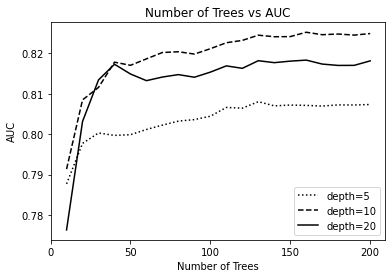

In [49]:
plt.figure(figsize=(6, 4))

num_trees = list(range(10, 201, 10))

plt.plot(num_trees, all_aucs[5], label='depth=5', color='black', linestyle='dotted')
plt.plot(num_trees, all_aucs[10], label='depth=10', color='black', linestyle='dashed')
plt.plot(num_trees, all_aucs[20], label='depth=20', color='black', linestyle='solid')
    
plt.xticks(range(0, 201, 50))
plt.legend()

plt.title('Number of Trees vs AUC')
plt.xlabel('Number of Trees')
plt.ylabel('AUC')


plt.show()

In [50]:
# Tunes the min_samples_leaf parameter
all_aucs = {} #A

for m in [3, 5, 10]:
    print('min_samples_leaf: %s' % m)
    aucs = []

    for i in range(10, 201, 20):
        rf = RandomForestClassifier(n_estimators=i, max_depth=10, min_samples_leaf=m, random_state=1)
        rf.fit(X_train, y_train)
        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        print('%s -> %.3f' % (i, auc))
        aucs.append(auc)
    
    all_aucs[m] = aucs
    print()

min_samples_leaf: 3
10 -> 0.811
30 -> 0.823
50 -> 0.823
70 -> 0.822
90 -> 0.823
110 -> 0.823
130 -> 0.824
150 -> 0.825
170 -> 0.825
190 -> 0.825

min_samples_leaf: 5
10 -> 0.813
30 -> 0.818
50 -> 0.821
70 -> 0.822
90 -> 0.822
110 -> 0.825
130 -> 0.825
150 -> 0.825
170 -> 0.825
190 -> 0.826

min_samples_leaf: 10
10 -> 0.810
30 -> 0.822
50 -> 0.822
70 -> 0.819
90 -> 0.820
110 -> 0.820
130 -> 0.821
150 -> 0.820
170 -> 0.820
190 -> 0.820



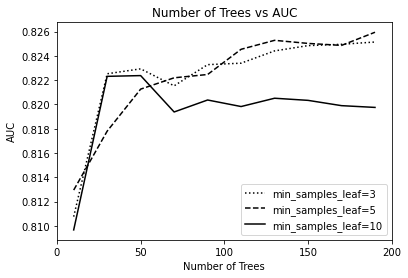

In [51]:
plt.figure(figsize=(6, 4))

num_trees = list(range(10, 201, 20))

plt.plot(num_trees, all_aucs[3], label='min_samples_leaf=3', color='black', linestyle='dotted')
plt.plot(num_trees, all_aucs[5], label='min_samples_leaf=5', color='black', linestyle='dashed')
plt.plot(num_trees, all_aucs[10], label='min_samples_leaf=10', color='black', linestyle='solid')
    
plt.xticks(range(0, 201, 50))
plt.legend()

plt.title('Number of Trees vs AUC')
plt.xlabel('Number of Trees')
plt.ylabel('AUC')


plt.show()

In [52]:
# Trains the final model
rf = RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_leaf=5, random_state=1)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=5, n_estimators=200,
                       random_state=1)

In [53]:
y_pred_rf = rf.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred_rf)

0.8253826499721489

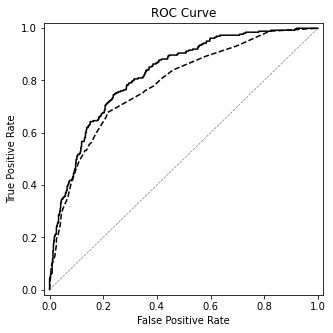

In [54]:
plt.figure(figsize=(5, 5))

fpr, tpr, _ = roc_curve(y_val, y_pred_rf)
plt.plot(fpr, tpr, color='black')

fpr, tpr, _ = roc_curve(y_val, y_pred_dt)
plt.plot(fpr, tpr, color='black', linestyle='dashed')

plt.plot([0, 1], [0, 1], color='black', lw=0.7, linestyle='dashed', alpha=0.5)

plt.xlim([-0.02, 1.02])
plt.ylim([-0.02, 1.02])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('ROC Curve')

plt.show()

## Gradient Boosting

### XGBoost: Extreme Gradient Boosting

In [55]:
import xgboost as xgb

In [56]:
# Wraps the data into DMatrix (a special data structure for finding splits efficiently)
# Passes 3 parameters: X_train (feature matrix), y_train (target variable), feature_names (feature names in X_train)
# Does the same for the validation dataset
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=dv.feature_names_)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=dv.feature_names_)

In [57]:
# specifies training parameters
xgb_params = {
    'eta': 0.3,
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'nthread': 8,
    'seed': 1
}

In [58]:
# Trains the XGBoost model
model = xgb.train(xgb_params, dtrain, num_boost_round=10)

[12:20:40] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [59]:
# Performs prediction on the validation dataset
y_pred = model.predict(dval)
y_pred[:10]

array([0.08926772, 0.0468099 , 0.09692743, 0.17261842, 0.05435968,
       0.12576081, 0.08033007, 0.61870354, 0.486538  , 0.04056795],
      dtype=float32)

In [60]:
# Calculates the AUC
roc_auc_score(y_val, y_pred)

0.8152745150274878

### Model performance monitoring

In [61]:
watchlist = [(dtrain, 'train'), (dval, 'val')]

In [62]:
# Modifies the list of parameters for training and specifies the metric used for evaluation
#A Sets the evaluation metric to AUC
xgb_params = {
    'eta': 0.3,
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc', #A
    'nthread': 8,
    'seed': 1
}

In [63]:
# Trains the modified model
model = xgb.train(xgb_params, dtrain,
                  num_boost_round=100,
                  evals=watchlist, verbose_eval=10)

[0]	train-auc:0.86300	val-auc:0.76818
[10]	train-auc:0.95002	val-auc:0.81558
[20]	train-auc:0.97316	val-auc:0.81775
[30]	train-auc:0.98772	val-auc:0.81788
[40]	train-auc:0.99456	val-auc:0.81387
[50]	train-auc:0.99688	val-auc:0.81128
[60]	train-auc:0.99889	val-auc:0.80801
[70]	train-auc:0.99944	val-auc:0.80732
[80]	train-auc:0.99985	val-auc:0.80677
[90]	train-auc:0.99991	val-auc:0.80637
[99]	train-auc:0.99997	val-auc:0.80546


In [64]:
%%capture output

model = xgb.train(xgb_params, dtrain,
                  num_boost_round=100,
                  evals=watchlist, verbose_eval=5)

In [65]:
# Parses the score to the output
def parse_xgb_output(output):
    tree = []
    aucs_train = []
    aucs_val = []

    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')

        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])

        tree.append(it)
        aucs_train.append(train)
        aucs_val.append(val)

    return tree, aucs_train, aucs_val

In [66]:
tree, aucs_train, aucs_val = parse_xgb_output(output)

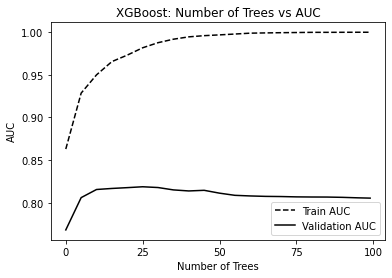

In [67]:
# Plots the scores
plt.figure(figsize=(6, 4))

plt.plot(tree, aucs_train, color='black', linestyle='dashed', label='Train AUC')
plt.plot(tree, aucs_val, color='black', linestyle='solid', label='Validation AUC')
plt.xticks(range(0, 101, 25))

plt.legend()

plt.title('XGBoost: Number of Trees vs AUC')
plt.xlabel('Number of Trees')
plt.ylabel('AUC')


plt.show()

### Parameter Tuning: eta (learning rate) - 0.1

In [68]:
%%capture output

xgb_params = {
    'eta': 0.1,
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
}

# Due to a lower eta, sets 500 rounds for training
model = xgb.train(xgb_params, dtrain,
                  num_boost_round=500, verbose_eval=10,
                  evals=watchlist)

In [69]:
tree, _, aucs_val_eta_03 = parse_xgb_output(output)
print(max(aucs_val_eta_03))
print(max(zip(aucs_val_eta_03, tree)))

0.82476
(0.82476, 70)


In [70]:
%%capture output

xgb_params = {
    'eta': 0.1,
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
}

model = xgb.train(xgb_params, dtrain,
                  num_boost_round=500, verbose_eval=10,
                  evals=watchlist)

In [71]:
tree, _, aucs_val_eta_01 = parse_xgb_output(output)
print(max(aucs_val_eta_01))
print(max(zip(aucs_val_eta_01, tree)))

0.82476
(0.82476, 70)


In [72]:
%%capture output

xgb_params = {
    'eta': 0.05,
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
}

model = xgb.train(xgb_params, dtrain,
                  num_boost_round=500, verbose_eval=10,
                  evals=watchlist)

In [73]:
tree, _, aucs_val_eta_005 = parse_xgb_output(output)
print(max(aucs_val_eta_005))
print(max(zip(aucs_val_eta_005, tree)))

0.82297
(0.82297, 120)


In [74]:
%%capture output

xgb_params = {
    'eta': 0.01,
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
}

model = xgb.train(xgb_params, dtrain,
                  num_boost_round=500, verbose_eval=10,
                  evals=watchlist)

In [75]:
tree, _, aucs_val_eta_001 = parse_xgb_output(output)
print(max(aucs_val_eta_001))
print(max(zip(aucs_val_eta_001, tree)))

0.82168
(0.82168, 499)


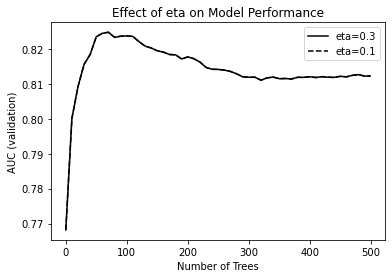

In [76]:
plt.figure(figsize=(6, 4))

plt.plot(tree, aucs_val_eta_03, color='black', linestyle='solid', label='eta=0.3')
plt.plot(tree, aucs_val_eta_01, color='black', linestyle='dashed', label='eta=0.1')
# plt.plot(tree, aucs_val_eta_005, color='grey', linestyle='solid', label='eta=0.05')
# plt.plot(tree, aucs_val_eta_001, color='grey', linestyle='dashed', label='eta=0.01')

plt.xticks(range(0, 501, 100))

plt.legend()

plt.title('Effect of eta on Model Performance')
plt.xlabel('Number of Trees')
plt.ylabel('AUC (validation)')


plt.show()

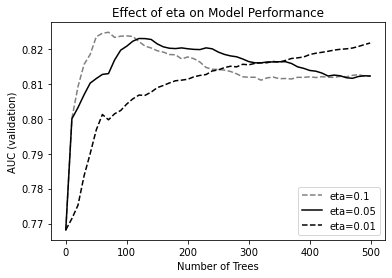

In [77]:
plt.figure(figsize=(6, 4))

plt.plot(tree, aucs_val_eta_01, color='grey', linestyle='dashed', label='eta=0.1')
plt.plot(tree, aucs_val_eta_005, color='black', linestyle='solid', label='eta=0.05')
plt.plot(tree, aucs_val_eta_001, color='black', linestyle='dashed', label='eta=0.01')

plt.xticks(range(0, 501, 100))

plt.legend()

plt.title('Effect of eta on Model Performance')
plt.xlabel('Number of Trees')
plt.ylabel('AUC (validation)')


plt.show()

### Parameter Tuning: max_depth

In [78]:
%%capture output

xgb_params = {
    'eta': 0.1,
    'max_depth': 3,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
}

model = xgb.train(xgb_params, dtrain,
                  num_boost_round=500, verbose_eval=10,
                  evals=watchlist)

In [79]:
tree, _, aucs_val_depth3 = parse_xgb_output(output)
print(max(aucs_val_depth3))
print(max(zip(aucs_val_depth3, tree)))

0.83657
(0.83657, 180)


In [80]:
%%capture output

xgb_params = {
    'eta': 0.1,
    'max_depth': 10,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
}

model = xgb.train(xgb_params, dtrain,
                  num_boost_round=500, verbose_eval=10,
                  evals=watchlist)

In [81]:
tree, _, aucs_val_depth10 = parse_xgb_output(output)
print(max(aucs_val))
print(max(zip(aucs_val_depth10, tree)))

0.81878
(0.81169, 100)


In [82]:
%%capture output

xgb_params = {
    'eta': 0.1,
    'max_depth': 4,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
}

model = xgb.train(xgb_params, dtrain,
                  num_boost_round=500, verbose_eval=10,
                  evals=watchlist)

In [83]:
tree, _, aucs_val_depth4 = parse_xgb_output(output)
print(max(aucs_val_depth4))
print(max(zip(aucs_val_depth4, tree)))

0.83014
(0.83014, 80)


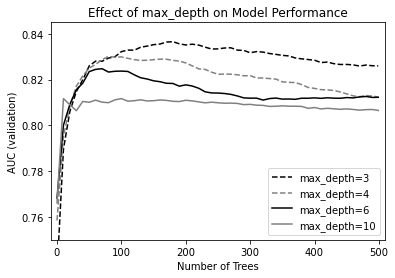

In [84]:
plt.figure(figsize=(6, 4))

plt.plot(tree, aucs_val_depth3, color='black', linestyle='dashed', label='max_depth=3')
plt.plot(tree, aucs_val_depth4, color='grey', linestyle='dashed', label='max_depth=4')
plt.plot(tree, aucs_val_eta_01, color='black', linestyle='solid', label='max_depth=6')
plt.plot(tree, aucs_val_depth10, color='grey', linestyle='solid', label='max_depth=10')

plt.ylim(0.75, 0.845)
plt.xlim(-10, 510)
plt.xticks(range(0, 501, 100))

plt.legend()

plt.title('Effect of max_depth on Model Performance')
plt.xlabel('Number of Trees')
plt.ylabel('AUC (validation)')


plt.show()

### Tuning "min_child_weight" parameter

In [85]:
%%capture output

xgb_params = {
    'eta': 0.1,
    'max_depth': 3,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
}

model = xgb.train(xgb_params, dtrain,
                  num_boost_round=500, verbose_eval=10,
                  evals=watchlist)

In [86]:
tree, _, aucs_val_mcw1 = parse_xgb_output(output)
print(max(aucs_val_mcw1))
print(max(zip(aucs_val_mcw1, tree)))

0.83657
(0.83657, 180)


In [87]:
%%capture output

xgb_params = {
    'eta': 0.1,
    'max_depth': 3,
    'min_child_weight': 10,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
}

model = xgb.train(xgb_params, dtrain,
                  num_boost_round=500, verbose_eval=10,
                  evals=watchlist)

In [88]:
tree, _, aucs_val_mcw10 = parse_xgb_output(output)
print(max(aucs_val_mcw10))
print(max(zip(aucs_val_mcw10, tree)))

0.83336
(0.83336, 150)


In [89]:
%%capture output

xgb_params = {
    'eta': 0.1,
    'max_depth': 3,
    'min_child_weight': 30,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
}

model = xgb.train(xgb_params, dtrain,
                  num_boost_round=500, verbose_eval=10,
                  evals=watchlist)

In [90]:
tree, _, aucs_val_mcw30 = parse_xgb_output(output)
print(max(aucs_val_mcw30))
print(max(zip(aucs_val_mcw30, tree)))

0.83543
(0.83543, 160)


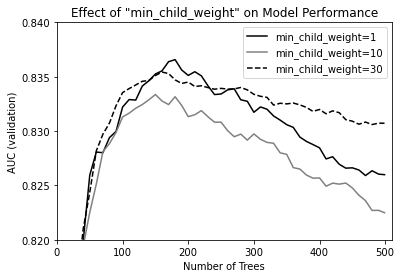

In [91]:
plt.figure(figsize=(6, 4))

plt.plot(tree, aucs_val_mcw1, color='black', linestyle='solid', label='min_child_weight=1')
plt.plot(tree, aucs_val_mcw10, color='grey', linestyle='solid', label='min_child_weight=10')
plt.plot(tree, aucs_val_mcw30, color='black', linestyle='dashed', label='min_child_weight=30')

plt.ylim(0.82, 0.84)
plt.xlim(0, 510)
plt.xticks(range(0, 501, 100))
plt.yticks(np.linspace(0.82, 0.84, 5))

plt.legend()

plt.title('Effect of "min_child_weight" on Model Performance')
plt.xlabel('Number of Trees')
plt.ylabel('AUC (validation)')


plt.show()

## Checking for the best number of trees

In [92]:
%%capture output

xgb_params = {
    'eta': 0.1,
    'max_depth': 3,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
}

model = xgb.train(xgb_params, dtrain,
                  num_boost_round=500, verbose_eval=10,
                  evals=watchlist)

In [93]:
print(output)

[0]	train-auc:0.77424	val-auc:0.73571
[10]	train-auc:0.84733	val-auc:0.78964
[20]	train-auc:0.86359	val-auc:0.80617
[30]	train-auc:0.87855	val-auc:0.81478
[40]	train-auc:0.88701	val-auc:0.81990
[50]	train-auc:0.89458	val-auc:0.82595
[60]	train-auc:0.90159	val-auc:0.82807
[70]	train-auc:0.90650	val-auc:0.82801
[80]	train-auc:0.91110	val-auc:0.82940
[90]	train-auc:0.91428	val-auc:0.82997
[100]	train-auc:0.91801	val-auc:0.83221
[110]	train-auc:0.92205	val-auc:0.83290
[120]	train-auc:0.92460	val-auc:0.83285
[130]	train-auc:0.92843	val-auc:0.83414
[140]	train-auc:0.93100	val-auc:0.83463
[150]	train-auc:0.93296	val-auc:0.83525
[160]	train-auc:0.93551	val-auc:0.83554
[170]	train-auc:0.93788	val-auc:0.83638
[180]	train-auc:0.93971	val-auc:0.83657
[190]	train-auc:0.94203	val-auc:0.83562
[200]	train-auc:0.94334	val-auc:0.83512
[210]	train-auc:0.94501	val-auc:0.83546
[220]	train-auc:0.94693	val-auc:0.83508
[230]	train-auc:0.94839	val-auc:0.83417
[240]	train-auc:0.94999	val-auc:0.83336
[250]	train

In [94]:
tree, _, aucs_val = parse_xgb_output(output)
print(max(aucs_val))

0.83657


In [95]:
max(zip(aucs_val, tree))

(0.83657, 180)

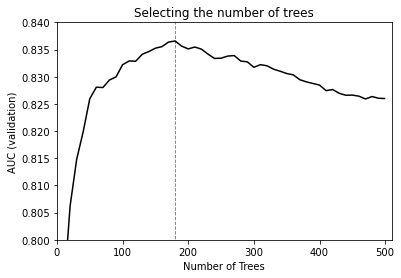

In [96]:
plt.figure(figsize=(6, 4))

plt.plot(tree, aucs_val, color='black', linestyle='solid')


plt.ylim(0.80, 0.84)
plt.xlim(0, 510)
plt.xticks(range(0, 501, 100))
plt.yticks(np.linspace(0.80, 0.84, 9))


plt.vlines(180, 0, 1, color='grey', linestyle='dashed', linewidth=0.9)

plt.title('Selecting the number of trees')
plt.xlabel('Number of Trees')
plt.ylabel('AUC (validation)')


plt.show()

## Final Model

In [97]:
xgb_params = {
    'eta': 0.1,
    'max_depth': 3,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
}

model = xgb.train(xgb_params, dtrain,
                  num_boost_round=180, verbose_eval=10,
                  evals=watchlist)

[0]	train-auc:0.77424	val-auc:0.73571
[10]	train-auc:0.84733	val-auc:0.78964
[20]	train-auc:0.86359	val-auc:0.80617
[30]	train-auc:0.87855	val-auc:0.81478
[40]	train-auc:0.88701	val-auc:0.81990
[50]	train-auc:0.89458	val-auc:0.82595
[60]	train-auc:0.90159	val-auc:0.82807
[70]	train-auc:0.90650	val-auc:0.82801
[80]	train-auc:0.91110	val-auc:0.82940
[90]	train-auc:0.91428	val-auc:0.82997
[100]	train-auc:0.91801	val-auc:0.83221
[110]	train-auc:0.92205	val-auc:0.83290
[120]	train-auc:0.92460	val-auc:0.83285
[130]	train-auc:0.92843	val-auc:0.83414
[140]	train-auc:0.93100	val-auc:0.83463
[150]	train-auc:0.93296	val-auc:0.83525
[160]	train-auc:0.93551	val-auc:0.83554
[170]	train-auc:0.93788	val-auc:0.83638
[179]	train-auc:0.93962	val-auc:0.83648


In [98]:
y_pred_xgb = model.predict(dval)

In [99]:
roc_auc_score(y_val, y_pred_xgb)

0.8364807100821002

In [100]:
print(roc_auc_score(y_val, y_pred_dt))
print(roc_auc_score(y_val, y_pred_rf))
print(roc_auc_score(y_val, y_pred_xgb))

0.7853194400716863
0.8253826499721489
0.8364807100821002


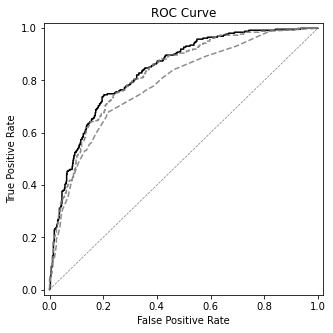

In [101]:
plt.figure(figsize=(5, 5))

fpr, tpr, _ = roc_curve(y_val, y_pred_xgb)
plt.plot(fpr, tpr, color='black')

fpr, tpr, _ = roc_curve(y_val, y_pred_rf)
plt.plot(fpr, tpr, color='grey', linestyle='dashed', alpha=0.9)

fpr, tpr, _ = roc_curve(y_val, y_pred_dt)
plt.plot(fpr, tpr, color='grey', linestyle='dashed', alpha=0.9)

plt.plot([0, 1], [0, 1], color='black', lw=0.7, linestyle='dashed', alpha=0.5)

plt.xlim([-0.02, 1.02])
plt.ylim([-0.02, 1.02])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('ROC Curve')

plt.show()

## Final Test

In [102]:
# Create the target variable
y_train_full = (df_train_full.status == 'default').values
y_test = (df_test.status == 'default').values

# Delete the target variable
del df_train_full['status']
del df_test['status']

In [103]:
# Convert dataframes into lists of dictionaries and uses one-hot encoding to obtain the feature matrices
dict_train_full = df_train_full.fillna(0).to_dict(orient='records')
dict_test = df_test.fillna(0).to_dict(orient='records')

dv = DictVectorizer(sparse=False)
X_train_full = dv.fit_transform(dict_train_full)
X_test = dv.transform(dict_test)

In [104]:

rf_final = RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_leaf=5, random_state=1)
rf_final.fit(X_train_full, y_train_full)

y_pred_rf = rf.predict_proba(X_test)[:, 1]

In [105]:
# Train the XGBoost model using the data from the above cell and optimum parameters previously determined
dtrain_full = xgb.DMatrix(X_train_full, label=y_train_full, feature_names=dv.feature_names_)
dtest = xgb.DMatrix(X_test, label=y_test, feature_names=dv.feature_names_)

xgb_params = {
    'eta': 0.1,
    'max_depth': 3,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
}

num_trees = 160

xgb_final = xgb.train(xgb_params, dtrain_full, num_boost_round=num_trees)

In [106]:
# Evaluates the performance of the trained model on the test dataset
y_pred_xgb = xgb_final.predict(dtest)

In [107]:
print(roc_auc_score(y_test, y_pred_rf))
print(roc_auc_score(y_test, y_pred_xgb))

0.8241777039245393
0.8322845901959826


## Feature Importance

### Decision Trees

In [108]:
dt.feature_importances_

array([0.01387723, 0.04970444, 0.1226385 , 0.00833288, 0.0250906 ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.18548089, 0.00699145, 0.        ,
       0.        , 0.17292753, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.0302163 ,
       0.24421676, 0.        , 0.12658146, 0.01394197])

In [109]:
list(zip(dv.feature_names_, dt.feature_importances_))

[('age', 0.013877231876069155),
 ('amount', 0.04970443671934234),
 ('assets', 0.1226385042392285),
 ('debt', 0.008332876385504904),
 ('expenses', 0.02509060257588133),
 ('home=ignore', 0.0),
 ('home=other', 0.0),
 ('home=owner', 0.0),
 ('home=parents', 0.0),
 ('home=private', 0.0),
 ('home=rent', 0.0),
 ('home=unk', 0.0),
 ('income', 0.185480885992072),
 ('job=fixed', 0.006991445659436668),
 ('job=freelance', 0.0),
 ('job=others', 0.0),
 ('job=partime', 0.17292752964348088),
 ('job=unk', 0.0),
 ('marital=divorced', 0.0),
 ('marital=married', 0.0),
 ('marital=separated', 0.0),
 ('marital=single', 0.0),
 ('marital=unk', 0.0),
 ('marital=widow', 0.0),
 ('price', 0.030216298419676546),
 ('records=no', 0.2442167576209344),
 ('records=yes', 0.0),
 ('seniority', 0.12658145602795504),
 ('time', 0.013941974840418335)]

In [110]:
importances = list(zip(dv.feature_names_, dt.feature_importances_))

df_importance = pd.DataFrame(importances, columns=['feature', 'gain'])
df_importance = df_importance.sort_values(by='gain', ascending=False)
df_importance

,feature,gain
25,records=no,0.244217
12,income,0.185481
16,job=partime,0.172928
27,seniority,0.126581
2,assets,0.122639
1,amount,0.049704
24,price,0.030216
4,expenses,0.025091
28,time,0.013942
0,age,0.013877


In [111]:
df_importance = df_importance[df_importance.gain > 0]

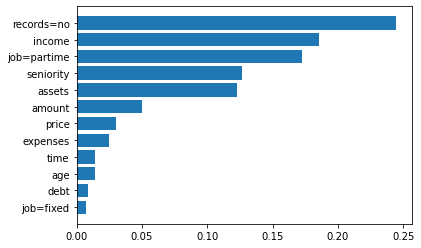

In [112]:
num = len(df_importance)
plt.barh(range(num), df_importance.gain[::-1])
plt.yticks(range(num), df_importance.feature[::-1])

plt.show()

### Random Forest

In [113]:
rf.feature_importances_

array([5.81509463e-02, 8.42444361e-02, 7.75901403e-02, 1.33739427e-02,
       3.62995916e-02, 1.26998064e-06, 5.25854792e-03, 2.57383446e-02,
       8.51497558e-03, 3.24437831e-03, 1.44619658e-02, 0.00000000e+00,
       1.50682384e-01, 4.78310889e-02, 9.96408243e-03, 2.85512508e-03,
       5.65260797e-02, 0.00000000e+00, 2.43128646e-04, 6.42996557e-03,
       1.68784119e-03, 6.67458246e-03, 0.00000000e+00, 1.97498337e-04,
       6.62193254e-02, 8.41683921e-02, 8.30420483e-02, 1.25453198e-01,
       3.11467205e-02])

In [114]:
importances = list(zip(dv.feature_names_, rf.feature_importances_))

df_importance = pd.DataFrame(importances, columns=['feature', 'gain'])
df_importance = df_importance.sort_values(by='gain', ascending=False)
df_importance

,feature,gain
12,income,0.150682
27,seniority,0.125453
1,amount,0.084244
25,records=no,0.084168
26,records=yes,0.083042
2,assets,0.077590
24,price,0.066219
0,age,0.058151
16,job=partime,0.056526
13,job=fixed,0.047831


In [115]:
df_importance = df_importance[df_importance.gain > 0.01]

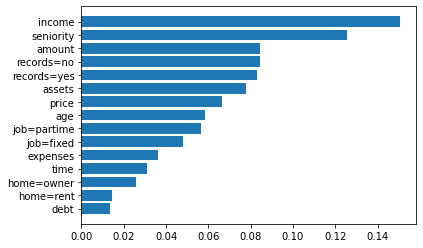

In [116]:
num = len(df_importance)
plt.barh(range(num), df_importance.gain[::-1])
plt.yticks(range(num), df_importance.feature[::-1])

plt.show()

### XGBoost

In [117]:
scores = model.get_score(importance_type='gain')
scores = sorted(scores.items(), key=lambda x: x[1])
list(reversed(scores))

[('records=no', 20.205886174933337),
 ('job=partime', 19.571840249333327),
 ('job=fixed', 14.703467482368419),
 ('home=owner', 12.168287986666668),
 ('seniority', 10.93204644173191),
 ('income', 8.676314024586466),
 ('assets', 5.918307806556342),
 ('amount', 5.400780562827161),
 ('time', 5.0175909627586215),
 ('home=parents', 4.499092019090908),
 ('home=rent', 4.028717651875),
 ('price', 3.7946846306606075),
 ('expenses', 3.589669993872826),
 ('age', 3.318183602467891),
 ('debt', 2.9418528487777773),
 ('marital=separated', 2.641880279076923),
 ('home=private', 2.4620430769999997),
 ('marital=married', 2.427789335636364),
 ('home=other', 2.3016982833333333),
 ('job=freelance', 2.25929752),
 ('job=others', 1.61876595),
 ('home=ignore', 0.7887506362000001)]

In [118]:
scores = model.get_score(importance_type='weight')
scores = sorted(scores.items(), key=lambda x: x[1])
list(reversed(scores))

[('price', 165),
 ('amount', 162),
 ('assets', 142),
 ('income', 133),
 ('seniority', 119),
 ('age', 109),
 ('expenses', 92),
 ('debt', 63),
 ('records=no', 60),
 ('time', 29),
 ('home=parents', 22),
 ('job=partime', 21),
 ('job=fixed', 19),
 ('marital=separated', 13),
 ('home=private', 12),
 ('marital=married', 11),
 ('home=rent', 8),
 ('home=owner', 6),
 ('home=ignore', 5),
 ('job=freelance', 4),
 ('home=other', 3),
 ('job=others', 1)]

In [119]:
names = [n for (n, s) in scores]
scores = [s for (n, s) in scores]

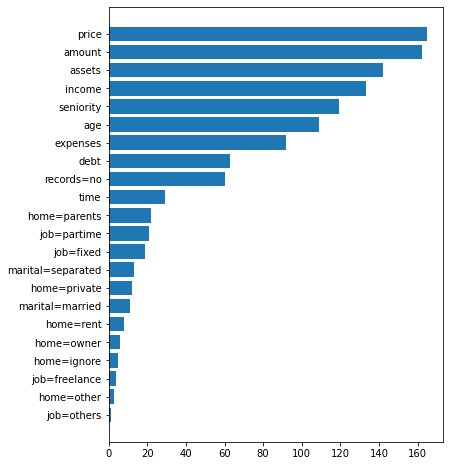

In [120]:
plt.figure(figsize=(6, 8))

plt.barh(np.arange(len(scores)), scores)
plt.yticks(np.arange(len(names)), names)

plt.show()

## Extremely Randomized Trees - similar to random forest but more random. Instead of selecting the best split amongst all posible splits, ET picks a few candidate splits at random and then selects the best out of them.

In [121]:
from sklearn.ensemble import ExtraTreesClassifier

In [122]:
aucs = []

for i in range(10, 201, 10):
    rf = ExtraTreesClassifier(n_estimators=i, max_depth=30)
    rf.fit(X_train, y_train)
    y_pred = rf.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    print('%s -> %.3f' % (i, auc))
    aucs.append(auc)

10 -> 0.776
20 -> 0.777
30 -> 0.783
40 -> 0.782
50 -> 0.781
60 -> 0.792
70 -> 0.790
80 -> 0.790
90 -> 0.795
100 -> 0.801
110 -> 0.792
120 -> 0.795
130 -> 0.794
140 -> 0.798
150 -> 0.791
160 -> 0.793
170 -> 0.795
180 -> 0.799
190 -> 0.795
200 -> 0.796
